# Predicting Diabetes at an early stage with Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting (at an early stage) whether or not someone has risk of having diabetes.

Approach:
1. Problem definition.
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition 

Given clinical parameters about a person, can we predict wheter or not they are going to develop diabetes at an early stage?

## 2. Data

The original data came from Sylhet Diabetes Hospital in Sylhet, Bangladesh.


## 3. Evaluation
If we can reach +80% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This dataset contains information on the signs and symptoms of newly diagnosed diabetic patients or those at risk of developing diabetes. The data was collected through direct questionnaires administered to patients at the Sylhet Diabetes Hospital in Sylhet, Bangladesh, and approved by a doctor.

Data Dictionary:
* Age: Range from 20 to 65 years
* Gender: 1 for Male, 2 for Female
* Polyuria: 1 for Yes, 2 for No
* Polydipsia: 1 for Yes, 2 for No
* Sudden Weight Loss: 1 for Yes, 2 for No
* Weakness: 1 for Yes, 2 for No
* Polyphagia: 1 for Yes, 2 for No
* Genital Thrush: 1 for Yes, 2 for No
* Visual Blurring: 1 for Yes, 2 for No
* Itching: 1 for Yes, 2 for No
* Irritability: 1 for Yes, 2 for No
* Delayed Healing: 1 for Yes, 2 for No
* Partial Paresis: 1 for Yes, 2 for No
* Muscle Stiffness: 1 for Yes, 2 for No
* Alopecia: 1 for Yes, 2 for No
* Obesity: 1 for Yes, 2 for No
* Class: 1 for Positive, 2 for Negative

## Preparing the Tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
!conda install -c anaconda seaborn -y #Seaborn not installed

Channels:
 - anaconda
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [2]:
# Importing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [3]:
df = pd.read_csv('diabetes_data_upload.csv')
df.shape

(520, 17)

## Data Exploration

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# Let's visualize how many of each class are there
df['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

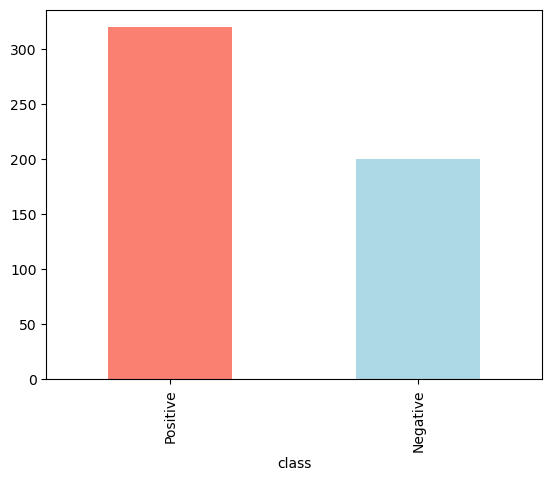

In [6]:
df["class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
# Are there any missing values?
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Comparing columns to find out more about the data

In [9]:
# Compare class column with gender column
pd.crosstab(df['class'], df['Gender'])

Gender,Female,Male
class,,
Negative,19,181
Positive,173,147


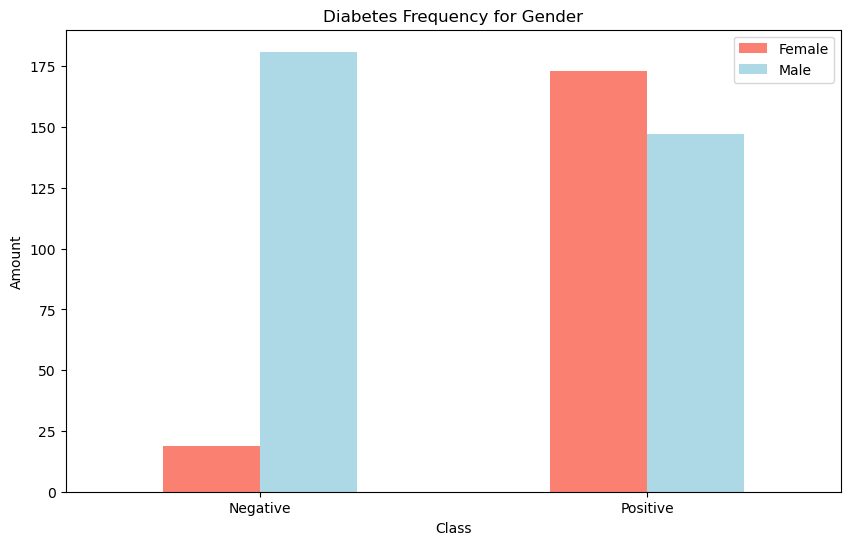

In [10]:
# Creating a plot of corsstab
pd.crosstab(df['class'], df['Gender']).plot(kind='bar',
                                        figsize=(10, 6),
                                        color=['salmon', 'lightblue'])

plt.title('Diabetes Frequency for Gender')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);
plt.show();

In [11]:
# Making a correlation matrix to see the influence of each feature
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

ValueError: could not convert string to float: 'Male'

In [12]:
# We need first to convert all the values into numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


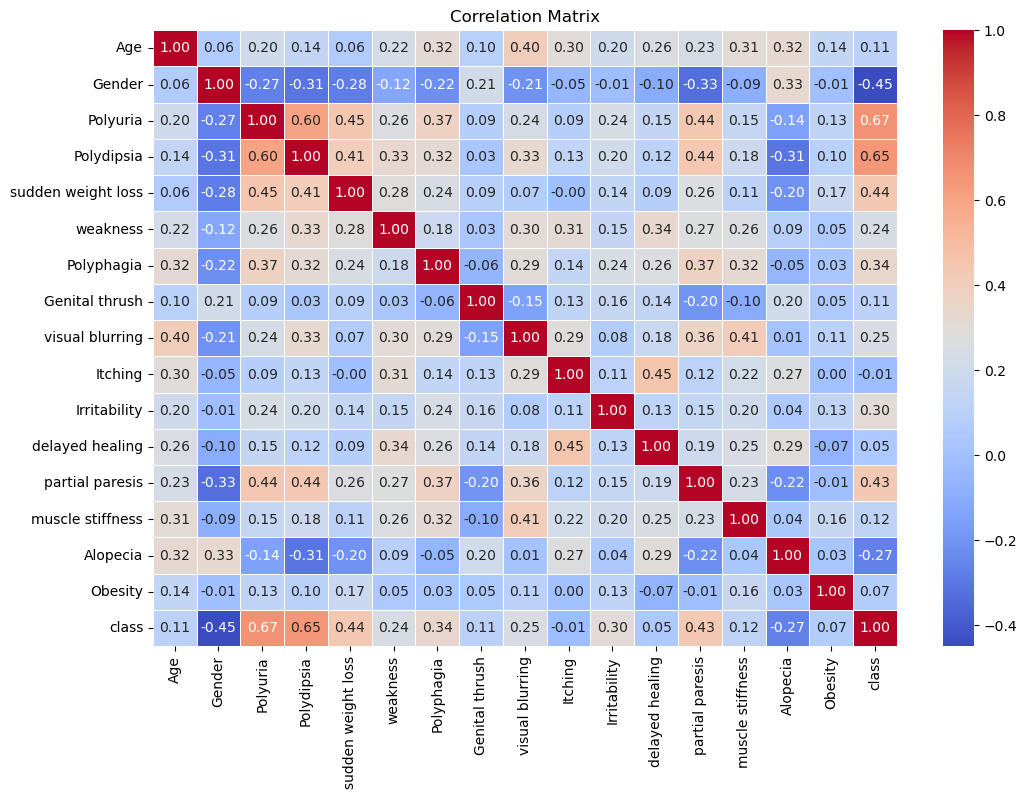

In [13]:
# Now we can make the correlation matrix
# Making a correlation matrix to see the influence of each feature
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='coolwarm');
plt.title('Correlation Matrix')
plt.show()

## Modelling

In [14]:
# Importing Required Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [15]:
# Splitting data into X and y
X = df.drop('class', axis=1)
y = df['class']

In [16]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [18]:
# Splitting into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [19]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Putting models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Setting a random seed (my lucky number)
    np.random.seed(23)
    # Make a dictionary to keep model scores
    model_scores={}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [38]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.9423076923076923,
 'KNN': 0.8653846153846154,
 'Random Forest': 1.0}

## Model Comparison

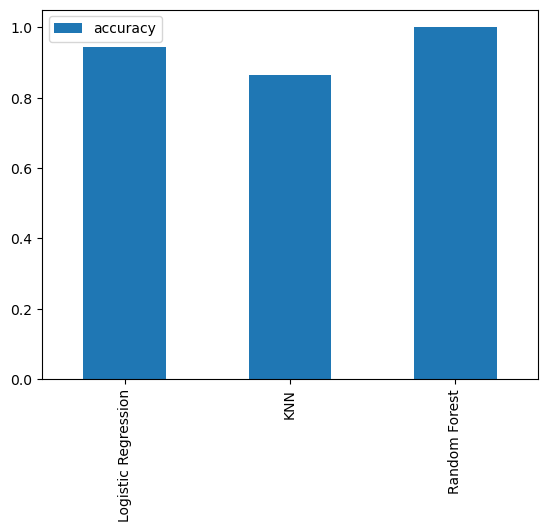

In [22]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();
plt.show();

## Calculating evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross validation and to do so we'll be using `cross_val_score`

In [39]:
# Selecting best score model
clf = RandomForestClassifier()

In [28]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.973076923076923

In [32]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9761990950226245

In [27]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.98125

In [29]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.9768287878787879

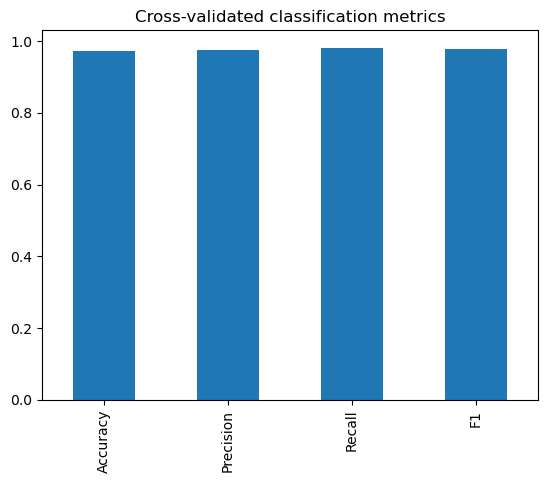

In [35]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False);
plt.show()

## Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our Random Forest Classifier model...

In [67]:
# Import neccesary tools
from sklearn.datasets import make_classification
import time
from sklearn.inspection import permutation_importance

In [69]:
# Fit an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=23)
clf.fit(X_train, y_train);

In [88]:
feature_names = [X.columns[i] for i in range(X.shape[1])]

### Feature importance based on mean decrease in impurity

In [89]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.019 seconds


In [90]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

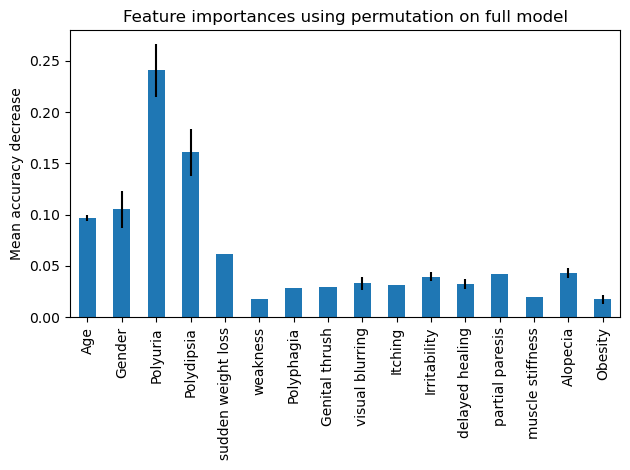

In [92]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Feature importance based on feature permutation
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [93]:
start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=23, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1.462 seconds


The computation for full permutation importance is more costly. Features are shuffled n times and the model refitted to estimate the importance of it.

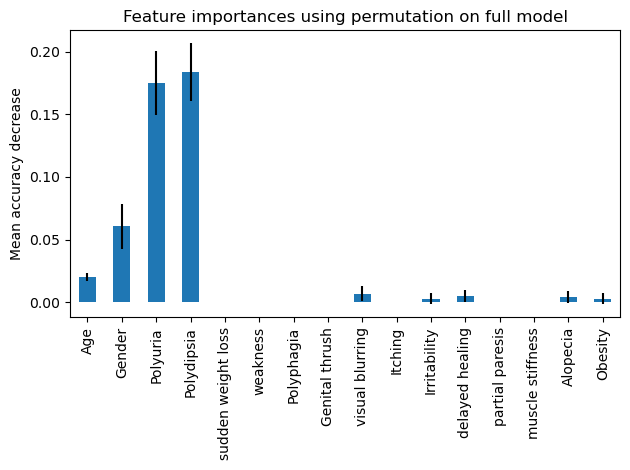

In [95]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()